<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_1_0_Euler_Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Euler, Modified Euler and Runge Kutta (RK4) solution**

#####Let's consider:
\begin{align}
  \dfrac{\mathrm{d^2}{y}}{\mathrm{d}t} + 2\dfrac{\mathrm{d}{y}}{\mathrm{d}t}+0.75{y}=0
    \end{align}
#####This is a second order differential equation.
#####Let’s reduce the second-order differential equation into two first-order equations as follow:
\begin{align}
  \dfrac{\mathrm{d}{y}}{\mathrm{d}t} = u(t) = y_1(t)
    \end{align}
\begin{align}
  \dfrac{\mathrm{d^2}{y}}{\mathrm{d}t} = \dfrac{\mathrm{d}{u(t)}}{\mathrm{d}t} = y_2(t)
    \end{align}
So, we can write,
\begin{align}
\dfrac{\mathrm{d}{u(t)}}{\mathrm{d}t} = -2*u(t) - 0.75*y(t)
    \end{align}
Or,
\begin{align}
y_2(t) = -2*u(t) - 0.75*y(t)
    \end{align}
Therefore,
\begin{align}
   \begin{bmatrix}
           y_1(t)\\
           y_2(t)
    \end{bmatrix} = \begin{bmatrix}
           \dfrac{\mathrm{d}{y(t)}}{\mathrm{d}t}\\
           -2*u(t) - 0.75*y(t)
    \end{bmatrix}
    \end{align}
Or,
\begin{align}
   \begin{bmatrix}
           y_1(t)\\
           y_2(t)
    \end{bmatrix} = \begin{bmatrix}
           \dfrac{\mathrm{d}{y(t)}}{\mathrm{d}t}\\
           -2\dfrac{\mathrm{d}{y(t)}}{\mathrm{d}t} - 0.75y(t)
    \end{bmatrix}
    \end{align}
Simply,
\begin{align}
   \begin{bmatrix}
           y_1\\
           y_2
    \end{bmatrix} = \begin{bmatrix}
           \dfrac{\mathrm{d}{y}}{\mathrm{d}t}\\
           -2\dfrac{\mathrm{d}{y}}{\mathrm{d}t} - 0.75y
    \end{bmatrix}
    \end{align}

Now, we can solve it by Euler or RK4.

**Environment**

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
t_e = np.linspace(0,1,100)
exact_sol = np.exp(-1.5*t_e)+2*np.exp(-0.5*t_e)

In [22]:
# initialization
t    = 0.0
y    = 3.0    # y(t) = 3.0
u    = -2.5   # y_dot(t) = -2.5
tf   = 1      # final value of t
dt   = 0.01   # step length
tt   = []     # store t
uu   = []

In [23]:
# 1st ODE
def f1(y,u,t):
    return u              # dy/dt=u ..> f1(y,u,t)
# 2nd ODE
def f2(y,u,t):
    return -2*u -0.75*y  # du/dt=y_2 ..> f2(y,u,t)

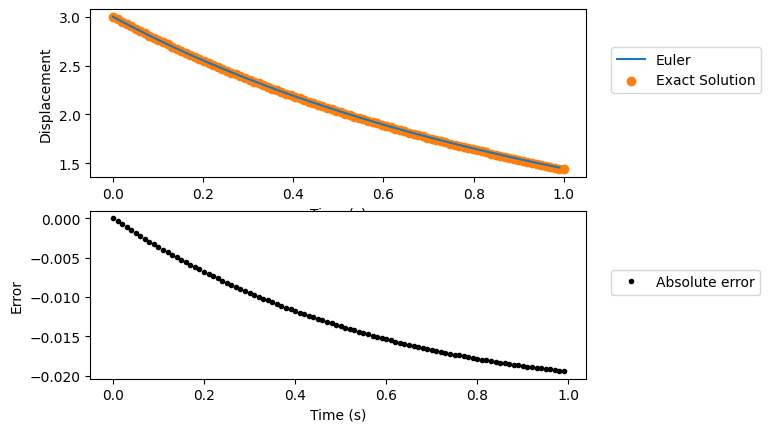

In [5]:
# Euler Solution
yye   = []     # store output
while t<=tf:
    tt.append(t)
    uu.append(u)
    yye.append(y)
    u+=dt*f2(y,u,t)
    y+=dt*f1(y,u,t)  
    t+=dt

plt.subplot(2,1,1)
plt.plot(tt,yye,label="Euler")
plt.scatter(t_e,exact_sol,color="tab:orange",label="Exact Solution")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend(loc=(1.05,0.5))

# Calculation of Error and plotting
diff_eu = exact_sol - yye
plt.subplot(2,1,2)
plt.plot(tt,diff_eu,'k.',label="Absolute error")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.legend(loc=(1.05,0.5))

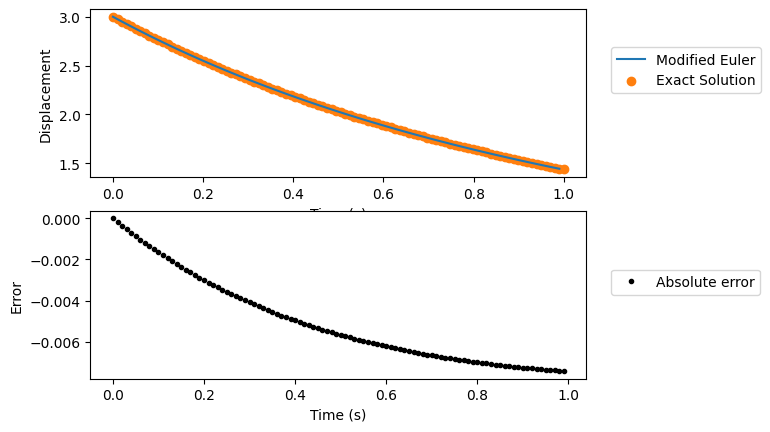

In [11]:
# Modified Euler Solution
yyem   = []     # store output
while t<=tf:
    tt.append(t)
    uu.append(u)
    yyem.append(y)
    p1=dt*f1(y,u,t) # at initial point
    p2=dt*f2(y,u,t) # at initial point
    q1=dt*f1(y+0.5*p1,u+0.5*p2,t+0.5*dt)
    q2=dt*f2(y+0.5*p1,u+0.5*p2,t+0.5*dt)
    u+=(p2+q2)/2.0
    y+=(p1+q1)/2.0 
    t+=dt

plt.subplot(2,1,1)
plt.plot(tt,yyem,label="Modified Euler")
plt.scatter(t_e,exact_sol,color="tab:orange",label="Exact Solution")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend(loc=(1.05,0.5))

# Calculation of Error and plotting
diff_eum = exact_sol - yyem
plt.subplot(2,1,2)
plt.plot(tt,diff_eum,'k.',label="Absolute error")
plt.xlabel("Time (s)")
plt.ylabel("Error")
plt.legend(loc=(1.05,0.5))

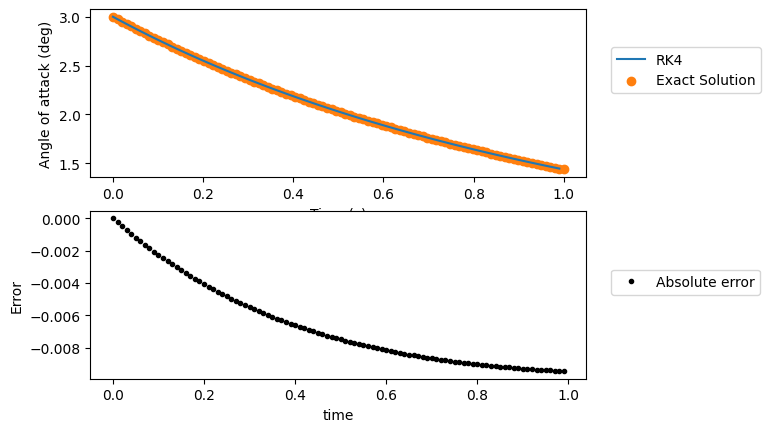

In [17]:
# RK4
yyrk   = []     # store output
while t<=tf:
    tt.append(t)
    uu.append(u)
    yyrk.append(y)
    p1=dt*f1(y,u,t) # at initial point
    p2=dt*f2(y,u,t) # at initial point
    q1=dt*f1(y+0.5*p1,u+0.5*p2,t+0.5*dt)
    q2=dt*f2(y+0.5*p1,u+0.5*p2,t+0.5*dt)
    r1=dt*f1(y+0.5*q1,u+0.5*q2,t+0.5*dt)
    r2=dt*f2(y+0.5*q1,u+0.5*q2,t+0.5*dt)
    s1=dt*f1(y+r1,u+r2,t+dt)
    s2=dt*f2(y+r1,u+r2,t+dt)
    u+=(p2+2*q2+2*r2+s2)/6.0
    y+=(p1+2*q1+2*r1+s1)/6.0
    t+=dt

plt.subplot(2,1,1)
plt.plot(tt,yyrk,label="RK4")
plt.scatter(t_e,exact_sol,color="tab:orange",label="Exact Solution")
plt.xlabel("Time (s)")
plt.ylabel("Angle of attack (deg)")
plt.legend(loc=(1.05,0.5))

# Calculation of Error and plotting
diff_rk = exact_sol - yyrk
plt.subplot(2,1,2)
plt.plot(tt,diff_rk,'k.',label="Absolute error")
plt.xlabel("time")
plt.ylabel("Error")
plt.legend(loc=(1.05,0.5))

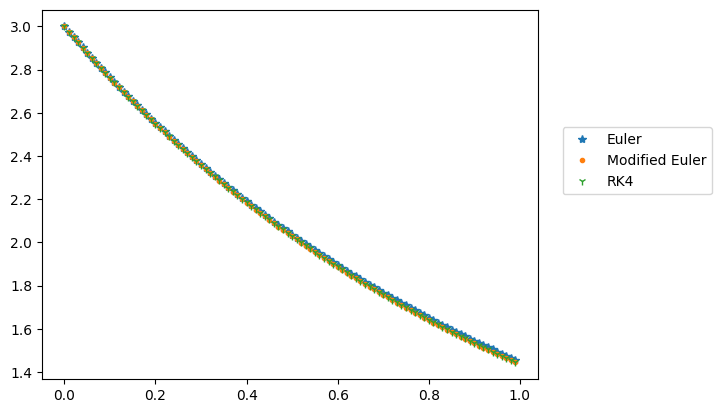

In [18]:
plt.plot(tt,yye,'*',label="Euler")
plt.plot(tt,yyem,'.',label="Modified Euler")
plt.plot(tt,yyrk,'1',label="RK4")
plt.legend(loc=(1.05,0.5))